# Projecting Mortality Rate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ye6frrf0 because the default path (/home/jjayme/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data0 = pd.read_csv('~/cpt5/capstone/data/processed/'
                   '2010-19_deaths_residence_age_sex.csv')

In [3]:
data0.head()

,Year,Region,Usual Residence,Type,Male,Female
0,2019,NATIONAL CAPITAL REGION (NCR),City of Manila,Under 1,317,269
1,2019,NATIONAL CAPITAL REGION (NCR),City of Mandaluyong,Under 1,44,49
2,2019,NATIONAL CAPITAL REGION (NCR),City of Marikina,Under 1,95,61
3,2019,NATIONAL CAPITAL REGION (NCR),City of Pasig,Under 1,148,106
4,2019,NATIONAL CAPITAL REGION (NCR),Quezon City,Under 1,512,380


In [4]:
data0.Type.value_counts()

Under 1        354
50-54          354
Not stated     354
85 and over    354
80-84          354
75-79          354
70-74          354
65-69          354
60-64          354
55-59          354
45-49          354
1-Apr          354
40-44          354
35-39          354
30-34          354
25-29          354
20-24          354
15-19          354
Oct-14         354
5-Sep          354
All ages       127
Name: Type, dtype: int64

**Typo error: Under 1 here should be Under 15**

In [5]:
data0.Year.value_counts()

2019    2360
2018    2360
2017    2360
2015      19
2016      18
2014      18
2013      18
2012      18
2011      18
2010      18
Name: Year, dtype: int64

In [6]:
data0.Region.value_counts()

NATIONAL CAPITAL REGION (NCR)                  1027
REGION III (CENTRAL LUZON)                      547
REGION VI (WESTERN VISAYAS)                     487
REGION X (NORTHERN MINDANAO)                    427
REGION VIII (EASTERN VISAYAS)                   427
CORDILLERA ADMINISTRATIVE REGION (CAR)          427
REGION VII (CENTRAL VISAYAS)                    427
REGION V (BICOL REGION)                         367
MIMAROPA REGION                                 367
REGION IV-A (CALABARZON)                        367
REGION XI (DAVAO REGION)                        367
REGION XII (SOCCSKSARGEN)                       367
REGION XIII (Caraga)                            367
REGION II (CAGAYAN VALLEY)                      307
REGION IX (ZAMBOANGA PENINSULA)                 307
AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM)     307
REGION I (ILOCOS REGION)                        247
FOREIGN COUNTRY                                  67
Negros Island Region                              1
Name: Region

In [7]:
data0.shape

(7207, 6)

In [8]:
data0 = data0[~(data0.Region=='FOREIGN COUNTRY')]

In [9]:
data0.Region.nunique()

18

In [10]:
data0[data0['Type']=='All ages']['Year'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010])

**The type = 'All ages' is only available for years 2010-2016.**

In [11]:
data0[data0['Year'] == 2017]['Type'].value_counts()

Under 1        117
1-Apr          117
85 and over    117
80-84          117
75-79          117
70-74          117
65-69          117
60-64          117
55-59          117
50-54          117
45-49          117
40-44          117
35-39          117
30-34          117
25-29          117
20-24          117
15-19          117
Oct-14         117
5-Sep          117
Not stated     117
Name: Type, dtype: int64

In [12]:
data0[data0['Year'] == 2018]['Type'].value_counts()

Under 1        117
1-Apr          117
85 and over    117
80-84          117
75-79          117
70-74          117
65-69          117
60-64          117
55-59          117
50-54          117
45-49          117
40-44          117
35-39          117
30-34          117
25-29          117
20-24          117
15-19          117
Oct-14         117
5-Sep          117
Not stated     117
Name: Type, dtype: int64

In [13]:
data0[data0['Year'] == 2019]['Type'].value_counts()

Under 1        117
1-Apr          117
85 and over    117
80-84          117
75-79          117
70-74          117
65-69          117
60-64          117
55-59          117
50-54          117
45-49          117
40-44          117
35-39          117
30-34          117
25-29          117
20-24          117
15-19          117
Oct-14         117
5-Sep          117
Not stated     117
Name: Type, dtype: int64

**Process years 2010-2016 for all ages**

In [14]:
data1016 = data0[data0['Year'].isin([2010,2011,2012,2013,2014,2015,2016])]

In [15]:
data1016['Type'].value_counts()

All ages    120
Name: Type, dtype: int64

**Process years 2017-2019 for all ages**

In [16]:
data1719 = data0[data0['Year'].isin([2017,2018,2019])]
data1719.head(2)

,Year,Region,Usual Residence,Type,Male,Female
0,2019,NATIONAL CAPITAL REGION (NCR),City of Manila,Under 1,317,269
1,2019,NATIONAL CAPITAL REGION (NCR),City of Mandaluyong,Under 1,44,49


In [17]:
data1719['Type'].value_counts()

Under 1        351
1-Apr          351
85 and over    351
80-84          351
75-79          351
70-74          351
65-69          351
60-64          351
55-59          351
50-54          351
45-49          351
40-44          351
35-39          351
30-34          351
25-29          351
20-24          351
15-19          351
Oct-14         351
5-Sep          351
Not stated     351
Name: Type, dtype: int64

**Typo**
- 1-Apr should be 1-4 (yrs.old)
- 5-Sept should be 5-9 (yrs. old)
- Oct-14 should be 10-14 (yrs.old)

<AxesSubplot:>

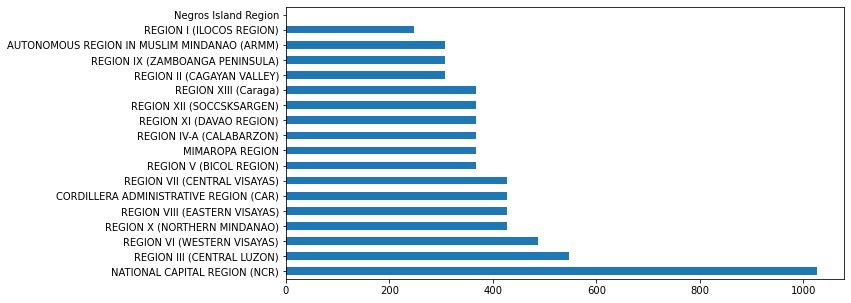

In [18]:
plt.figure(figsize=(10,5))
data0.Region.value_counts().plot(kind='barh')

In [19]:
# The island of Negros is divided into Negros Occidental which belongs to Region 6
# and Negros Oriental which belongs to Region 7

data0[data0['Region']=='Negros Island Region']

,Year,Region,Usual Residence,Type,Male,Female
7115,2015,Negros Island Region,All provinces,All ages,16755,12392


In [20]:
# data0.loc[data0['Region']=='Negros Island Region', 'Region'] = 'REGION VI (WESTERN VISAYAS)'

In [21]:
data0.Region.value_counts()

NATIONAL CAPITAL REGION (NCR)                  1027
REGION III (CENTRAL LUZON)                      547
REGION VI (WESTERN VISAYAS)                     487
REGION X (NORTHERN MINDANAO)                    427
REGION VIII (EASTERN VISAYAS)                   427
CORDILLERA ADMINISTRATIVE REGION (CAR)          427
REGION VII (CENTRAL VISAYAS)                    427
REGION V (BICOL REGION)                         367
MIMAROPA REGION                                 367
REGION IV-A (CALABARZON)                        367
REGION XI (DAVAO REGION)                        367
REGION XII (SOCCSKSARGEN)                       367
REGION XIII (Caraga)                            367
REGION II (CAGAYAN VALLEY)                      307
REGION IX (ZAMBOANGA PENINSULA)                 307
AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM)     307
REGION I (ILOCOS REGION)                        247
Negros Island Region                              1
Name: Region, dtype: int64

<AxesSubplot:>

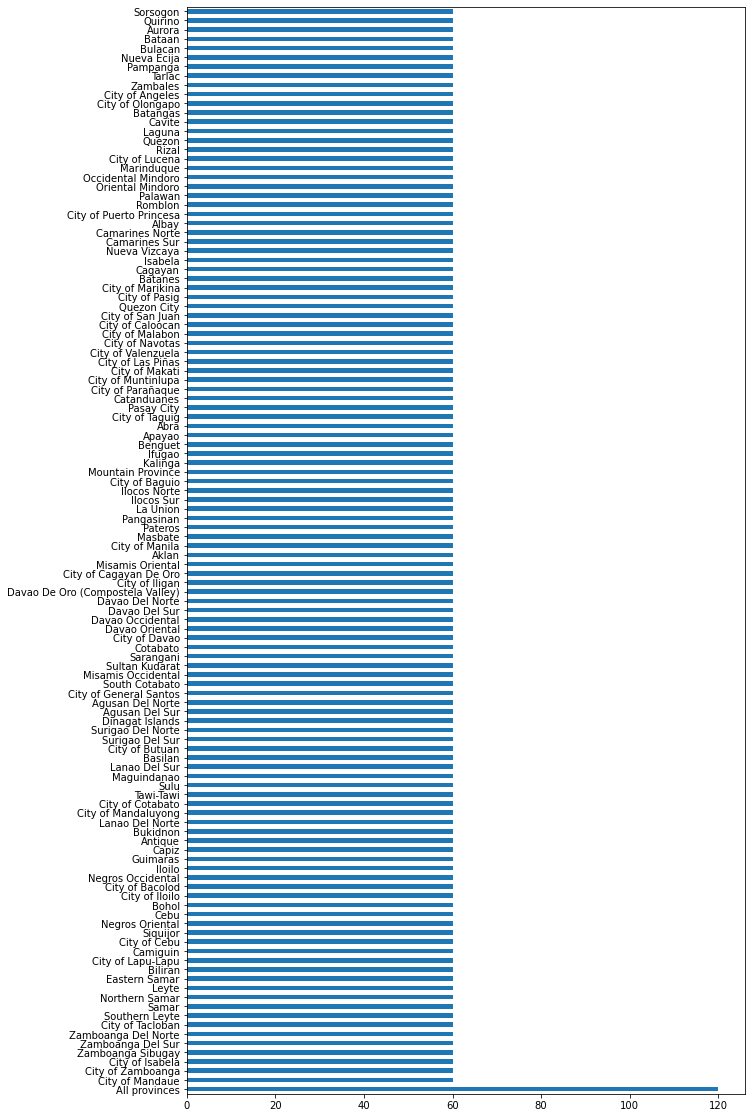

In [22]:
plt.figure(figsize=(10,20))
data0['Usual Residence'].value_counts().plot(kind='barh')

In [23]:
data0['Usual Residence'].nunique()

118

In [24]:
data0.groupby(['Year']).agg(len)

,Region,Usual Residence,Type,Male,Female
Year,,,,,
2010,17,17,17,17,17
2011,17,17,17,17,17
2012,17,17,17,17,17
2013,17,17,17,17,17
2014,17,17,17,17,17
2015,18,18,18,18,18
2016,17,17,17,17,17
2017,2340,2340,2340,2340,2340
2018,2340,2340,2340,2340,2340


In [25]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7140 entries, 0 to 7205
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             7140 non-null   int64 
 1   Region           7140 non-null   object
 2   Usual Residence  7140 non-null   object
 3   Type             7140 non-null   object
 4   Male             7140 non-null   object
 5   Female           7140 non-null   object
dtypes: int64(1), object(5)
memory usage: 390.5+ KB


# Data Cleaning

In [26]:
data0['Male'] = data0['Male'].apply(lambda x: x.replace(',', ''))
data0['Female'] = data0['Female'].apply(lambda x: x.replace(',', ''))

In [27]:
# Data Cleaning

data0.loc[data0['Male']=='-', 'Male'] = 0
data0.loc[data0['Female']=='-', 'Female'] = 0

In [28]:
data0['Male'] = data0['Male'].astype(int)
data0['Female'] = data0['Female'].astype(int)

In [29]:
data0['All_genders'] = data0['Male'] + data0['Female']

In [30]:
data0.head(2)

,Year,Region,Usual Residence,Type,Male,Female,All_genders
0,2019,NATIONAL CAPITAL REGION (NCR),City of Manila,Under 1,317,269,586
1,2019,NATIONAL CAPITAL REGION (NCR),City of Mandaluyong,Under 1,44,49,93


In [31]:
death_year_counts = pd.DataFrame(data0.groupby('Year')['All_genders'].sum()).reset_index()

In [32]:
death_year_counts

,Year,All_genders
0,2010,488006
1,2011,498274
2,2012,514411
3,2013,530938
4,2014,536697
5,2015,560267
6,2016,581731
7,2017,578652
8,2018,590223
9,2019,619872


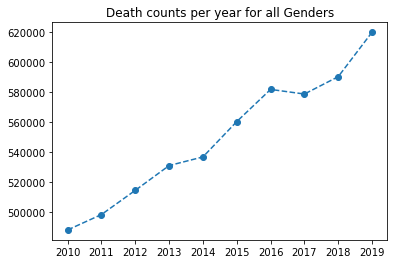

In [33]:
plt.plot(death_year_counts['Year'], death_year_counts['All_genders'], '--o')
plt.xticks(np.arange(2010,2020))
plt.title('Death counts per year for all Genders');

In [34]:
death_year_per_region = data0.groupby(['Year', 'Region'])['All_genders'].sum().reset_index()
death_year_per_region

,Year,Region,All_genders
0,2010,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),1251
1,2010,CORDILLERA ADMINISTRATIVE REGION (CAR),6440
2,2010,MIMAROPA REGION,12530
3,2010,NATIONAL CAPITAL REGION (NCR),68559
4,2010,REGION I (ILOCOS REGION),32815
...,...,...,...
166,2019,REGION VIII (EASTERN VISAYAS),26143
167,2019,REGION X (NORTHERN MINDANAO),27438
168,2019,REGION XI (DAVAO REGION),32384
169,2019,REGION XII (SOCCSKSARGEN),23500


In [35]:
death_year_per_region['Region'].unique().tolist()

['AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM)',
 'CORDILLERA ADMINISTRATIVE REGION (CAR)',
 'MIMAROPA REGION',
 'NATIONAL CAPITAL REGION (NCR)',
 'REGION I (ILOCOS REGION)',
 'REGION II (CAGAYAN VALLEY)',
 'REGION III (CENTRAL LUZON)',
 'REGION IV-A (CALABARZON)',
 'REGION IX (ZAMBOANGA PENINSULA)',
 'REGION V (BICOL REGION)',
 'REGION VI (WESTERN VISAYAS)',
 'REGION VII (CENTRAL VISAYAS)',
 'REGION VIII (EASTERN VISAYAS)',
 'REGION X (NORTHERN MINDANAO)',
 'REGION XI (DAVAO REGION)',
 'REGION XII (SOCCSKSARGEN)',
 'REGION XIII (Caraga)',
 'Negros Island Region']

In [36]:
labels = ["ARMM / BARMM", "CAR",
          "MIMAROPA", "NCR",
          "I - Ilocos", "II - Cagayan",
          "III - C. Luzon", "IVA - Calabarzon",
          "IX - Zamboanga", "V - Bicol",
          "VI - W. Visayas", "VII - C. Visayas",
          "VIII - E. Visayas", "X - N. Mindanao",
          "XI - Davao", "XII - SOCCSKSARGEN",
          "XIII - Caraga", "Negros Island Region"]

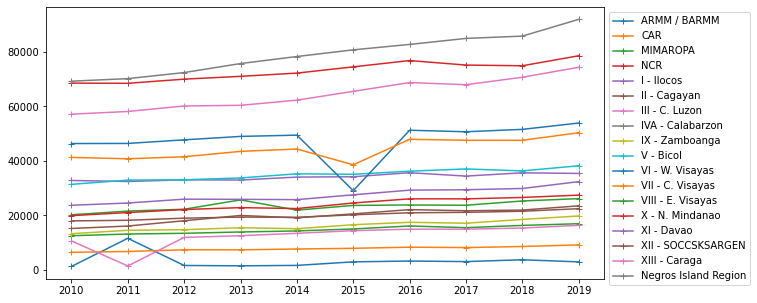

In [37]:
plt.figure(figsize=(10,5))
for i,j in zip(death_year_per_region['Region'].unique(),
              labels):
    df = death_year_per_region[death_year_per_region['Region']==i]
    plt.plot(df['Year'], df['All_genders'], '+-', label=j)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2020));

In [38]:
data0[data0['Region']=='Negros Island Region']

,Year,Region,Usual Residence,Type,Male,Female,All_genders
7115,2015,Negros Island Region,All provinces,All ages,16755,12392,29147


**There seems to be an underestimate in the mortality counts 
for Region 6 and 7 in year 2015 due to the isolated `Negros Island Region` record (shown above).
This 1 data point was not added for the two regions. It is difficult to distribute the record (29k) in the two regions. The proposed solution is to remove the 2015 records for the 2 regions and interpolate (linearly) the missing 2015 data.**

In [39]:
df = pd.pivot(death_year_per_region, index='Year', columns='Region', values='All_genders')
df

Region,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),CORDILLERA ADMINISTRATIVE REGION (CAR),MIMAROPA REGION,NATIONAL CAPITAL REGION (NCR),Negros Island Region,REGION I (ILOCOS REGION),REGION II (CAGAYAN VALLEY),REGION III (CENTRAL LUZON),REGION IV-A (CALABARZON),REGION IX (ZAMBOANGA PENINSULA),REGION V (BICOL REGION),REGION VI (WESTERN VISAYAS),REGION VII (CENTRAL VISAYAS),REGION VIII (EASTERN VISAYAS),REGION X (NORTHERN MINDANAO),REGION XI (DAVAO REGION),REGION XII (SOCCSKSARGEN),REGION XIII (Caraga)
Year,,,,,,,,,,,,,,,,,,
2010,1251.0,6440.0,12530.0,68559.0,NaN,32815.0,17979.0,57164.0,69272.0,13271.0,31400.0,46374.0,41286.0,20224.0,19910.0,23711.0,15197.0,10623.0
2011,11580.0,6740.0,13154.0,68490.0,NaN,32439.0,18203.0,58143.0,70205.0,14517.0,32948.0,46413.0,40787.0,21575.0,21028.0,24537.0,16084.0,1431.0
2012,1610.0,7373.0,13424.0,70018.0,NaN,33050.0,18977.0,60164.0,72434.0,14749.0,33064.0,47731.0,41521.0,22255.0,22146.0,25953.0,18036.0,11906.0
2013,1484.0,7349.0,13907.0,71050.0,NaN,32983.0,19374.0,60409.0,75743.0,15469.0,33751.0,48990.0,43500.0,25689.0,22845.0,25895.0,19965.0,12535.0
2014,1634.0,7654.0,14288.0,72235.0,NaN,34060.0,19298.0,62297.0,78326.0,15105.0,35253.0,49460.0,44358.0,21927.0,22504.0,25782.0,19101.0,13415.0
2015,2938.0,7909.0,15012.0,74530.0,29147.0,34190.0,20212.0,65540.0,80778.0,16573.0,35086.0,29082.0,38578.0,23658.0,24551.0,27549.0,20547.0,14387.0
2016,3236.0,8329.0,16105.0,76839.0,NaN,35666.0,20952.0,68757.0,82764.0,17457.0,36228.0,51256.0,47937.0,23821.0,26070.0,29260.0,22115.0,14939.0
2017,3036.0,8176.0,15489.0,75185.0,NaN,34427.0,21115.0,67980.0,84971.0,17123.0,37052.0,50701.0,47575.0,23721.0,26065.0,29415.0,21693.0,14928.0
2018,3703.0,8576.0,16313.0,74934.0,NaN,35627.0,21516.0,70706.0,85816.0,18512.0,36331.0,51580.0,47569.0,25292.0,26580.0,29870.0,21950.0,15348.0


In [40]:
df.loc[2015, 'REGION VI (WESTERN VISAYAS)'] = np.nan

In [41]:
df.loc[:,'REGION VI (WESTERN VISAYAS)']

Year
2010    46374.0
2011    46413.0
2012    47731.0
2013    48990.0
2014    49460.0
2015        NaN
2016    51256.0
2017    50701.0
2018    51580.0
2019    53899.0
Name: REGION VI (WESTERN VISAYAS), dtype: float64

In [42]:
df.loc[2015, 'REGION VII (CENTRAL VISAYAS)'] = np.nan

In [43]:
df.loc[:,'REGION VII (CENTRAL VISAYAS)']

Year
2010    41286.0
2011    40787.0
2012    41521.0
2013    43500.0
2014    44358.0
2015        NaN
2016    47937.0
2017    47575.0
2018    47569.0
2019    50335.0
Name: REGION VII (CENTRAL VISAYAS), dtype: float64

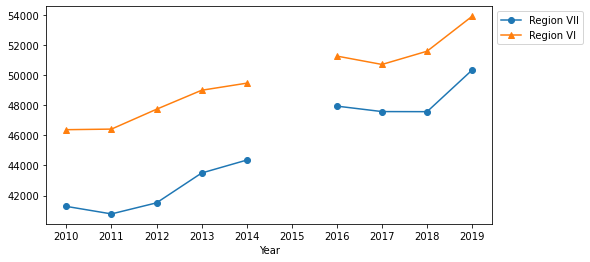

In [44]:
plt.figure(figsize=(8,4))
df.loc[:,'REGION VII (CENTRAL VISAYAS)'].plot(marker='o', label='Region VII')
df.loc[:,'REGION VI (WESTERN VISAYAS)'].plot(marker='^', label='Region VI')
plt.xticks(np.arange(2010,2020))
plt.legend(bbox_to_anchor=(1,1));

In [45]:
x = np.arange(2010,2020)

In [46]:
y_r7 = df.loc[:,'REGION VII (CENTRAL VISAYAS)'].interpolate()
y_r6 = df.loc[:,'REGION VI (WESTERN VISAYAS)'].interpolate()

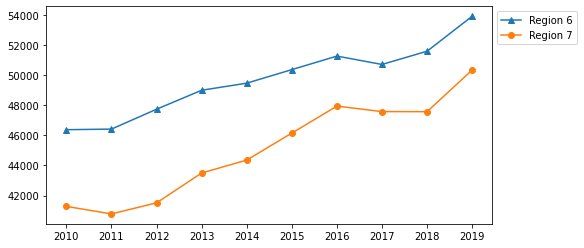

In [47]:
plt.figure(figsize=(8, 4))
plt.plot(x, y_r6, '-^', label='Region 6')
plt.plot(x, y_r7, '-o', label='Region 7')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2020));

In [48]:
x

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [49]:
df.loc[:, 'REGION VI (WESTERN VISAYAS)'] = y_r6
df.loc[:, 'REGION VII (CENTRAL VISAYAS)'] = y_r7

In [50]:
df = df.reset_index()

In [51]:
df.drop(columns='Negros Island Region', inplace=True)

In [52]:
df.columns

Index(['Year', 'AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM)',
       'CORDILLERA ADMINISTRATIVE REGION (CAR)', 'MIMAROPA REGION',
       'NATIONAL CAPITAL REGION (NCR)', 'REGION I (ILOCOS REGION)',
       'REGION II (CAGAYAN VALLEY)', 'REGION III (CENTRAL LUZON)',
       'REGION IV-A (CALABARZON)', 'REGION IX (ZAMBOANGA PENINSULA)',
       'REGION V (BICOL REGION)', 'REGION VI (WESTERN VISAYAS)',
       'REGION VII (CENTRAL VISAYAS)', 'REGION VIII (EASTERN VISAYAS)',
       'REGION X (NORTHERN MINDANAO)', 'REGION XI (DAVAO REGION)',
       'REGION XII (SOCCSKSARGEN)', 'REGION XIII (Caraga)'],
      dtype='object', name='Region')

In [53]:
df['ph_death'] = df.iloc[:, 1:].sum(axis=1)

In [54]:
cols = ['year', 'ARMM_death', 'CAR_death', 'R4b_death',
        'NCR_death', 'R1_death', 'R2_death', 'R3_death','R4a_death',
        'R9_death', 'R5_death', 'R6_death', 'R7_death', 'R8_death',
        'R10_death', 'R11_death', 'R12_death', 'CARAGA_death', 'ph_death']
df.columns = cols

In [55]:
df

,year,ARMM_death,CAR_death,R4b_death,NCR_death,R1_death,R2_death,R3_death,R4a_death,R9_death,R5_death,R6_death,R7_death,R8_death,R10_death,R11_death,R12_death,CARAGA_death,ph_death
0,2010,1251.0,6440.0,12530.0,68559.0,32815.0,17979.0,57164.0,69272.0,13271.0,31400.0,46374.0,41286.0,20224.0,19910.0,23711.0,15197.0,10623.0,488006.0
1,2011,11580.0,6740.0,13154.0,68490.0,32439.0,18203.0,58143.0,70205.0,14517.0,32948.0,46413.0,40787.0,21575.0,21028.0,24537.0,16084.0,1431.0,498274.0
2,2012,1610.0,7373.0,13424.0,70018.0,33050.0,18977.0,60164.0,72434.0,14749.0,33064.0,47731.0,41521.0,22255.0,22146.0,25953.0,18036.0,11906.0,514411.0
3,2013,1484.0,7349.0,13907.0,71050.0,32983.0,19374.0,60409.0,75743.0,15469.0,33751.0,48990.0,43500.0,25689.0,22845.0,25895.0,19965.0,12535.0,530938.0
4,2014,1634.0,7654.0,14288.0,72235.0,34060.0,19298.0,62297.0,78326.0,15105.0,35253.0,49460.0,44358.0,21927.0,22504.0,25782.0,19101.0,13415.0,536697.0
5,2015,2938.0,7909.0,15012.0,74530.0,34190.0,20212.0,65540.0,80778.0,16573.0,35086.0,50358.0,46147.5,23658.0,24551.0,27549.0,20547.0,14387.0,559965.5
6,2016,3236.0,8329.0,16105.0,76839.0,35666.0,20952.0,68757.0,82764.0,17457.0,36228.0,51256.0,47937.0,23821.0,26070.0,29260.0,22115.0,14939.0,581731.0
7,2017,3036.0,8176.0,15489.0,75185.0,34427.0,21115.0,67980.0,84971.0,17123.0,37052.0,50701.0,47575.0,23721.0,26065.0,29415.0,21693.0,14928.0,578652.0
8,2018,3703.0,8576.0,16313.0,74934.0,35627.0,21516.0,70706.0,85816.0,18512.0,36331.0,51580.0,47569.0,25292.0,26580.0,29870.0,21950.0,15348.0,590223.0
9,2019,2930.0,9155.0,16944.0,78599.0,35398.0,22462.0,74374.0,91969.0,19782.0,38213.0,53899.0,50335.0,26143.0,27438.0,32384.0,23500.0,16347.0,619872.0


In [56]:
df_new = df.loc[:, ['year', 'ph_death', 'NCR_death', 'CAR_death',
                    'R1_death', 'R2_death', 'R3_death','R4a_death',
                    'R4b_death', 'R5_death', 'R6_death', 'R7_death',
                    'R8_death', 'R9_death', 'R10_death', 'R11_death',
                    'R12_death', 'CARAGA_death', 'ARMM_death']]

In [57]:
df_new

,year,ph_death,NCR_death,CAR_death,R1_death,R2_death,R3_death,R4a_death,R4b_death,R5_death,R6_death,R7_death,R8_death,R9_death,R10_death,R11_death,R12_death,CARAGA_death,ARMM_death
0,2010,488006.0,68559.0,6440.0,32815.0,17979.0,57164.0,69272.0,12530.0,31400.0,46374.0,41286.0,20224.0,13271.0,19910.0,23711.0,15197.0,10623.0,1251.0
1,2011,498274.0,68490.0,6740.0,32439.0,18203.0,58143.0,70205.0,13154.0,32948.0,46413.0,40787.0,21575.0,14517.0,21028.0,24537.0,16084.0,1431.0,11580.0
2,2012,514411.0,70018.0,7373.0,33050.0,18977.0,60164.0,72434.0,13424.0,33064.0,47731.0,41521.0,22255.0,14749.0,22146.0,25953.0,18036.0,11906.0,1610.0
3,2013,530938.0,71050.0,7349.0,32983.0,19374.0,60409.0,75743.0,13907.0,33751.0,48990.0,43500.0,25689.0,15469.0,22845.0,25895.0,19965.0,12535.0,1484.0
4,2014,536697.0,72235.0,7654.0,34060.0,19298.0,62297.0,78326.0,14288.0,35253.0,49460.0,44358.0,21927.0,15105.0,22504.0,25782.0,19101.0,13415.0,1634.0
5,2015,559965.5,74530.0,7909.0,34190.0,20212.0,65540.0,80778.0,15012.0,35086.0,50358.0,46147.5,23658.0,16573.0,24551.0,27549.0,20547.0,14387.0,2938.0
6,2016,581731.0,76839.0,8329.0,35666.0,20952.0,68757.0,82764.0,16105.0,36228.0,51256.0,47937.0,23821.0,17457.0,26070.0,29260.0,22115.0,14939.0,3236.0
7,2017,578652.0,75185.0,8176.0,34427.0,21115.0,67980.0,84971.0,15489.0,37052.0,50701.0,47575.0,23721.0,17123.0,26065.0,29415.0,21693.0,14928.0,3036.0
8,2018,590223.0,74934.0,8576.0,35627.0,21516.0,70706.0,85816.0,16313.0,36331.0,51580.0,47569.0,25292.0,18512.0,26580.0,29870.0,21950.0,15348.0,3703.0
9,2019,619872.0,78599.0,9155.0,35398.0,22462.0,74374.0,91969.0,16944.0,38213.0,53899.0,50335.0,26143.0,19782.0,27438.0,32384.0,23500.0,16347.0,2930.0


In [58]:
regions = ['NCR_death', 'CAR_death',
        'R1_death', 'R2_death', 'R3_death','R4a_death',
        'R4b_death', 'R5_death', 'R6_death', 'R7_death',
        'R8_death', 'R9_death', 'R10_death', 'R11_death',
        'R12_death', 'CARAGA_death', 'ARMM_death']

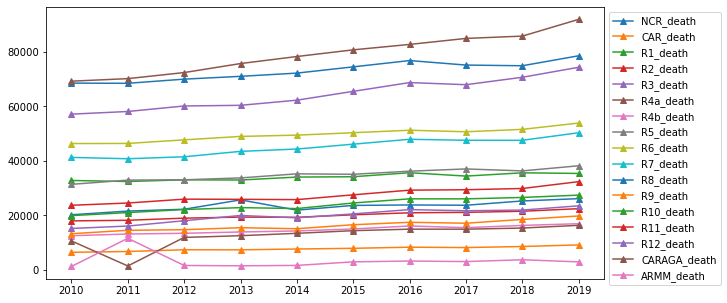

In [59]:
plt.figure(figsize=(10,5))
for i in regions:
    series_death = df_new[i]
    plt.plot(x, series_death, '^-', label=i)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2020));

In [60]:
reg = ['CARAGA_death',
        'ARMM_death']

# Fixing messy data

**It seems that CARAGA and ARMM mortality counts have interchanged for year 2011.**

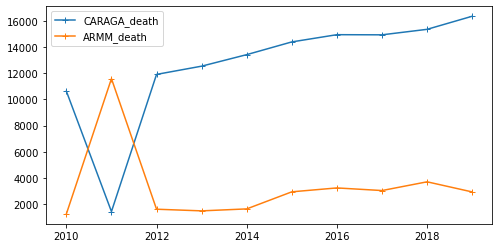

In [61]:
plt.figure(figsize=(8,4))
for i,j in zip(reg, reg):
    series_death = df_new[i]
    plt.plot(x, series_death, '+-', label=j)
plt.legend()

In [62]:
df_new

,year,ph_death,NCR_death,CAR_death,R1_death,R2_death,R3_death,R4a_death,R4b_death,R5_death,R6_death,R7_death,R8_death,R9_death,R10_death,R11_death,R12_death,CARAGA_death,ARMM_death
0,2010,488006.0,68559.0,6440.0,32815.0,17979.0,57164.0,69272.0,12530.0,31400.0,46374.0,41286.0,20224.0,13271.0,19910.0,23711.0,15197.0,10623.0,1251.0
1,2011,498274.0,68490.0,6740.0,32439.0,18203.0,58143.0,70205.0,13154.0,32948.0,46413.0,40787.0,21575.0,14517.0,21028.0,24537.0,16084.0,1431.0,11580.0
2,2012,514411.0,70018.0,7373.0,33050.0,18977.0,60164.0,72434.0,13424.0,33064.0,47731.0,41521.0,22255.0,14749.0,22146.0,25953.0,18036.0,11906.0,1610.0
3,2013,530938.0,71050.0,7349.0,32983.0,19374.0,60409.0,75743.0,13907.0,33751.0,48990.0,43500.0,25689.0,15469.0,22845.0,25895.0,19965.0,12535.0,1484.0
4,2014,536697.0,72235.0,7654.0,34060.0,19298.0,62297.0,78326.0,14288.0,35253.0,49460.0,44358.0,21927.0,15105.0,22504.0,25782.0,19101.0,13415.0,1634.0
5,2015,559965.5,74530.0,7909.0,34190.0,20212.0,65540.0,80778.0,15012.0,35086.0,50358.0,46147.5,23658.0,16573.0,24551.0,27549.0,20547.0,14387.0,2938.0
6,2016,581731.0,76839.0,8329.0,35666.0,20952.0,68757.0,82764.0,16105.0,36228.0,51256.0,47937.0,23821.0,17457.0,26070.0,29260.0,22115.0,14939.0,3236.0
7,2017,578652.0,75185.0,8176.0,34427.0,21115.0,67980.0,84971.0,15489.0,37052.0,50701.0,47575.0,23721.0,17123.0,26065.0,29415.0,21693.0,14928.0,3036.0
8,2018,590223.0,74934.0,8576.0,35627.0,21516.0,70706.0,85816.0,16313.0,36331.0,51580.0,47569.0,25292.0,18512.0,26580.0,29870.0,21950.0,15348.0,3703.0
9,2019,619872.0,78599.0,9155.0,35398.0,22462.0,74374.0,91969.0,16944.0,38213.0,53899.0,50335.0,26143.0,19782.0,27438.0,32384.0,23500.0,16347.0,2930.0


In [63]:
df_new.loc[1, 'CARAGA_death']

1431.0

In [64]:
df_new.loc[1, 'ARMM_death'] 

11580.0

In [65]:
df_new.loc[1, 'ARMM_death'] = 1431
df_new.loc[1, 'CARAGA_death'] = 11580

In [66]:
df_new.to_csv('Death_count_by_region_2010-2019.csv')

# Concatenate 2020 death counts

In [67]:
df_2020 = pd.read_excel('~/cpt5/capstone/data/raw/2020 Deaths Statistical '
                      'Tables_JRV_CRD (1).xlsx', header=1)

In [68]:
df_2020

,Region/Province/City/Municipality,Total Deaths,Unnamed: 2,Maternal Deaths,Unnamed: 4,Infant Deaths,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Usual Residence,Place of Occurrence,Usual Residence,Place of Occurrence,Usual Residence,Place of Occurrence,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TOTAL,613936,613936,1975,1975,16885,16885,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Turtle Islands,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1741,FOREIGN COUNTRY,374,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1742,Source: Philippine Statistics Authority (Data ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1743,Notes: Figures are results of actual registra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_2020.columns

Index(['Region/Province/City/Municipality ', 'Total Deaths', 'Unnamed: 2',
       'Maternal Deaths', 'Unnamed: 4', 'Infant Deaths', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

In [70]:
df_2020['Region/Province/City/Municipality '].unique()

array([nan, 'TOTAL', 'NATIONAL CAPITAL REGION (NCR)', ...,
       'Source: Philippine Statistics Authority (Data on deaths are those registered at the Office of the City/Municipal Civil Registrars throughout the country and \n             submitted to the Office of the Civil Registrar General using Certificate of Death-Municipal Form No. 103)\n',
       'Notes:  Figures are results of actual registration without any adjustment for under registration',
       '   Total includes deaths of decedents whose usual residence is abroad'],
      dtype=object)

In [71]:
df_2020 = df_2020.iloc[3:1742]
df_2020

,Region/Province/City/Municipality,Total Deaths,Unnamed: 2,Maternal Deaths,Unnamed: 4,Infant Deaths,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
3,TOTAL,613936,613936,1975,1975,16885,16885,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NATIONAL CAPITAL REGION (NCR),84355,93637,277,320,2859,3380,NaN,NaN,NaN,NaN,NaN,NaN
6,FIRST DISTRICT,12808,17439,35,65,362,923,NaN,NaN,NaN,NaN,NaN,NaN
7,City of Manila,12808,17439,35,65,362,923,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,Sitangkai,43,35,0,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN
1738,South Ubian,9,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1739,Tandubas,72,72,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1740,Turtle Islands,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df_2020.isna().sum()

Region/Province/City/Municipality        1
Total Deaths                             1
Unnamed: 2                               1
Maternal Deaths                          1
Unnamed: 4                               1
Infant Deaths                            1
Unnamed: 6                               1
Unnamed: 7                            1739
Unnamed: 8                            1739
Unnamed: 9                            1739
Unnamed: 10                           1739
Unnamed: 11                           1739
Unnamed: 12                           1739
dtype: int64

In [73]:
df_2020 = df_2020[~df_2020['Region/Province/City/Municipality '].isna()]

In [74]:
df_2020 = df_2020[df_2020['Region/Province/City/Municipality '].str.contains(
                                'REGION|TOTAL')].reset_index(drop=True)

In [75]:
df_ = df_2020[['Region/Province/City/Municipality ', 'Total Deaths']]

In [76]:
df_.columns = ['Region', 2020]

In [77]:
df_.loc[df_['Region'] == 'TOTAL', 'Region'] = 'ph_death'

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [78]:
df_

,Region,2020
0,ph_death,613936
1,NATIONAL CAPITAL REGION (NCR),84355
2,CORDILLERA ADMINISTRATIVE REGION (CAR),8540
3,REGION I (ILOCOS REGION),34848
4,REGION II (CAGAYAN VALLEY),20352
5,REGION III (CENTRAL LUZON),71756
6,REGION IV-A (CALABARZON),94898
7,MIMAROPA REGION,16090
8,REGION V (BICOL REGION),34789
9,REGION VI (WESTERN VISAYAS),51505


In [79]:
df_T = df_.T
df_T = df_T.reset_index()

In [80]:
cols = df_['Region'].unique()
cols

array(['ph_death', 'NATIONAL CAPITAL REGION (NCR)',
       'CORDILLERA ADMINISTRATIVE REGION (CAR)',
       'REGION I (ILOCOS REGION)', 'REGION II (CAGAYAN VALLEY)',
       'REGION III (CENTRAL LUZON)', 'REGION IV-A (CALABARZON)',
       ' MIMAROPA REGION', 'REGION V (BICOL REGION)',
       'REGION VI (WESTERN VISAYAS)', 'REGION VII (CENTRAL VISAYAS)',
       'REGION VIII (EASTERN VISAYAS)', 'REGION IX (ZAMBOANGA PENINSULA)',
       'REGION X (NORTHERN MINDANAO)', 'REGION XI (DAVAO REGION)',
       'REGION XII (SOCCSKSARGEN)', 'REGION XIII (CARAGA)',
       'AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM)'], dtype=object)

In [81]:
df_T.columns = df_new.columns

In [82]:
df_T.iloc[1:, ]

,year,ph_death,NCR_death,CAR_death,R1_death,R2_death,R3_death,R4a_death,R4b_death,R5_death,R6_death,R7_death,R8_death,R9_death,R10_death,R11_death,R12_death,CARAGA_death,ARMM_death
1,2020,613936,84355,8540,34848,20352,71756,94898,16090,34789,51505,50477,25492,19143,26485,31270,23130,15806,4626


In [83]:
df_new = pd.concat([df_new, df_T.iloc[1:, ]]).reset_index(drop=True)

In [84]:
df_new = df_new.astype(int)

In [85]:
df_new

,year,ph_death,NCR_death,CAR_death,R1_death,R2_death,R3_death,R4a_death,R4b_death,R5_death,R6_death,R7_death,R8_death,R9_death,R10_death,R11_death,R12_death,CARAGA_death,ARMM_death
0,2010,488006,68559,6440,32815,17979,57164,69272,12530,31400,46374,41286,20224,13271,19910,23711,15197,10623,1251
1,2011,498274,68490,6740,32439,18203,58143,70205,13154,32948,46413,40787,21575,14517,21028,24537,16084,11580,1431
2,2012,514411,70018,7373,33050,18977,60164,72434,13424,33064,47731,41521,22255,14749,22146,25953,18036,11906,1610
3,2013,530938,71050,7349,32983,19374,60409,75743,13907,33751,48990,43500,25689,15469,22845,25895,19965,12535,1484
4,2014,536697,72235,7654,34060,19298,62297,78326,14288,35253,49460,44358,21927,15105,22504,25782,19101,13415,1634
5,2015,559965,74530,7909,34190,20212,65540,80778,15012,35086,50358,46147,23658,16573,24551,27549,20547,14387,2938
6,2016,581731,76839,8329,35666,20952,68757,82764,16105,36228,51256,47937,23821,17457,26070,29260,22115,14939,3236
7,2017,578652,75185,8176,34427,21115,67980,84971,15489,37052,50701,47575,23721,17123,26065,29415,21693,14928,3036
8,2018,590223,74934,8576,35627,21516,70706,85816,16313,36331,51580,47569,25292,18512,26580,29870,21950,15348,3703
9,2019,619872,78599,9155,35398,22462,74374,91969,16944,38213,53899,50335,26143,19782,27438,32384,23500,16347,2930


In [86]:
regions

['NCR_death',
 'CAR_death',
 'R1_death',
 'R2_death',
 'R3_death',
 'R4a_death',
 'R4b_death',
 'R5_death',
 'R6_death',
 'R7_death',
 'R8_death',
 'R9_death',
 'R10_death',
 'R11_death',
 'R12_death',
 'CARAGA_death',
 'ARMM_death']

In [87]:
labels = ["NCR", "CAR", "I - Ilocos", "II - Cagayan",
          "III - C. Luzon", "IVA - Calabarzon",
          "MIMAROPA", "V - Bicol", "VI - W. Visayas",
          "VII - C. Visayas", "VIII - E. Visayas", 
          "IX - Zamboanga",
          "X - N. Mindanao", "XI - Davao", "XII - SOCCSKSARGEN",
          "XIII - Caraga", "(B)ARMM"]

In [88]:
x = np.arange(2010, 2021)
# labels = ['NATIONAL CAPITAL REGION (NCR)',
#        'CORDILLERA ADMINISTRATIVE REGION (CAR)',
#        'REGION I (ILOCOS REGION)', 'REGION II (CAGAYAN VALLEY)',
#        'REGION III (CENTRAL LUZON)', 'REGION IV-A (CALABARZON)',
#        ' MIMAROPA REGION', 'REGION V (BICOL REGION)',
#        'REGION VI (WESTERN VISAYAS)', 'REGION VII (CENTRAL VISAYAS)',
#        'REGION VIII (EASTERN VISAYAS)', 'REGION IX (ZAMBOANGA PENINSULA)',
#        'REGION X (NORTHERN MINDANAO)', 'REGION XI (DAVAO REGION)',
#        'REGION XII (SOCCSKSARGEN)', 'REGION XIII (CARAGA)',
#        'AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM)']

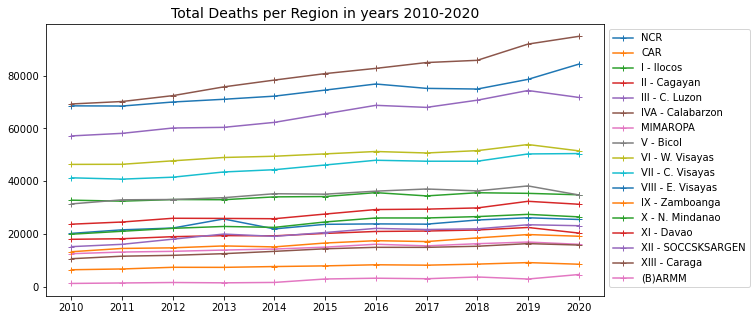

In [89]:
plt.figure(figsize=(10,5))
for i,j in zip(regions, labels):
    series_death = df_new[i]
    plt.plot(x, series_death, '+-', label=j)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2021))
plt.title('Total Deaths per Region in years 2010-2020', fontsize=14);

In [90]:
# df_new.to_csv('Death_count_by_region_2010-2020.csv')

In [91]:
df_new

,year,ph_death,NCR_death,CAR_death,R1_death,R2_death,R3_death,R4a_death,R4b_death,R5_death,R6_death,R7_death,R8_death,R9_death,R10_death,R11_death,R12_death,CARAGA_death,ARMM_death
0,2010,488006,68559,6440,32815,17979,57164,69272,12530,31400,46374,41286,20224,13271,19910,23711,15197,10623,1251
1,2011,498274,68490,6740,32439,18203,58143,70205,13154,32948,46413,40787,21575,14517,21028,24537,16084,11580,1431
2,2012,514411,70018,7373,33050,18977,60164,72434,13424,33064,47731,41521,22255,14749,22146,25953,18036,11906,1610
3,2013,530938,71050,7349,32983,19374,60409,75743,13907,33751,48990,43500,25689,15469,22845,25895,19965,12535,1484
4,2014,536697,72235,7654,34060,19298,62297,78326,14288,35253,49460,44358,21927,15105,22504,25782,19101,13415,1634
5,2015,559965,74530,7909,34190,20212,65540,80778,15012,35086,50358,46147,23658,16573,24551,27549,20547,14387,2938
6,2016,581731,76839,8329,35666,20952,68757,82764,16105,36228,51256,47937,23821,17457,26070,29260,22115,14939,3236
7,2017,578652,75185,8176,34427,21115,67980,84971,15489,37052,50701,47575,23721,17123,26065,29415,21693,14928,3036
8,2018,590223,74934,8576,35627,21516,70706,85816,16313,36331,51580,47569,25292,18512,26580,29870,21950,15348,3703
9,2019,619872,78599,9155,35398,22462,74374,91969,16944,38213,53899,50335,26143,19782,27438,32384,23500,16347,2930


In [92]:
df_pop = pd.read_csv('~/cpt5/capstone/data/processed/'
                      'regional_projection_2010_2030.csv')
df_pop.drop(columns='Unnamed: 0', inplace=True)

In [93]:
df_pop.head()

,year,Philippines,NCR,CAR,I - Ilocos,II - Cagayan,III - C. Luzon,IVA - Calabarzon,MIMAROPA,V - Bicol,VI - W. Visayas,VII - C. Visayas,VIII - E. Visayas,IX - Zamboanga,X - N. Mindanao,XI - Davao,XII - SOCCSKSARGEN,XIII - Caraga,BARMM
0,2010,92337852.0,11855975.0,1616867.0,4748372.0,3229163.0,10137737.0,12609803.0,2744671.0,5420411.0,7102438.0,6800180.0,4101322.0,3407353.0,4297323.0,4468563.0,4109571.0,2429224.0,3256140.0
1,2011,94036955.8,12056622.2,1637520.4,4802931.8,3272824.0,10350003.4,12965281.6,2787635.0,5494390.2,7187679.6,6917412.8,4167888.0,3451048.4,4374333.2,4552012.0,4195172.4,2462126.8,3359882.8
2,2012,95736059.6,12257269.4,1658173.8,4857491.6,3316485.0,10562269.8,13320760.2,2830599.0,5568369.4,7272921.2,7034645.6,4234454.0,3494743.8,4451343.4,4635461.0,4280773.8,2495029.6,3463625.6
3,2013,97435163.4,12457916.6,1678827.2,4912051.4,3360146.0,10774536.2,13676238.8,2873563.0,5642348.6,7358162.8,7151878.4,4301020.0,3538439.2,4528353.6,4718910.0,4366375.2,2527932.4,3567368.4
4,2014,99134267.2,12658563.8,1699480.6,4966611.2,3403807.0,10986802.6,14031717.4,2916527.0,5716327.8,7443404.4,7269111.2,4367586.0,3582134.6,4605363.8,4802359.0,4451976.6,2560835.2,3671111.2


In [94]:
df1 = df_new.merge(df_pop, on='year')
df1

,year,ph_death,NCR_death,CAR_death,R1_death,R2_death,R3_death,R4a_death,R4b_death,R5_death,...,V - Bicol,VI - W. Visayas,VII - C. Visayas,VIII - E. Visayas,IX - Zamboanga,X - N. Mindanao,XI - Davao,XII - SOCCSKSARGEN,XIII - Caraga,BARMM
0,2010,488006,68559,6440,32815,17979,57164,69272,12530,31400,...,5420411.0,7102438.0,6800180.0,4101322.0,3407353.0,4297323.0,4468563.0,4109571.0,2429224.0,3256140.0
1,2011,498274,68490,6740,32439,18203,58143,70205,13154,32948,...,5494390.2,7187679.6,6917412.8,4167888.0,3451048.4,4374333.2,4552012.0,4195172.4,2462126.8,3359882.8
2,2012,514411,70018,7373,33050,18977,60164,72434,13424,33064,...,5568369.4,7272921.2,7034645.6,4234454.0,3494743.8,4451343.4,4635461.0,4280773.8,2495029.6,3463625.6
3,2013,530938,71050,7349,32983,19374,60409,75743,13907,33751,...,5642348.6,7358162.8,7151878.4,4301020.0,3538439.2,4528353.6,4718910.0,4366375.2,2527932.4,3567368.4
4,2014,536697,72235,7654,34060,19298,62297,78326,14288,35253,...,5716327.8,7443404.4,7269111.2,4367586.0,3582134.6,4605363.8,4802359.0,4451976.6,2560835.2,3671111.2
5,2015,559965,74530,7909,34190,20212,65540,80778,15012,35086,...,5790307.0,7528646.0,7386344.0,4434152.0,3625830.0,4682374.0,4885808.0,4537578.0,2593738.0,3774854.0
6,2016,581731,76839,8329,35666,20952,68757,82764,16105,36228,...,5865520.0,7610389.0,7511565.0,4495990.0,3660328.0,4755673.0,4967320.0,4621162.0,2627491.0,3853142.0
7,2017,578652,75185,8176,34427,21115,67980,84971,15489,37052,...,5937321.0,7688734.0,7631003.0,4557614.0,3693191.0,4825658.0,5048419.0,4701027.0,2660236.0,3932991.0
8,2018,590223,74934,8576,35627,21516,70706,85816,16313,36331,...,6005949.0,7763898.0,7745017.0,4619183.0,3724550.0,4892512.0,5129342.0,4777419.0,2692072.0,4014587.0
9,2019,619872,78599,9155,35398,22462,74374,91969,16944,38213,...,6071398.0,7835883.0,7853606.0,4680701.0,3754387.0,4956259.0,5210081.0,4850329.0,2723012.0,4097957.0


In [95]:
# df_pop.columns

In [96]:
deaths = ['ph_death', 'NCR_death', 'CAR_death', 'R1_death', 'R2_death',
       'R3_death', 'R4a_death', 'R4b_death', 'R5_death', 'R6_death',
       'R7_death', 'R8_death', 'R9_death', 'R10_death', 'R11_death',
       'R12_death', 'CARAGA_death', 'ARMM_death']

pops = ['Philippines', 'NCR', 'CAR', 'I - Ilocos', 'II - Cagayan',
       'III - C. Luzon', 'IVA - Calabarzon', 'MIMAROPA', 'V - Bicol',
       'VI - W. Visayas', 'VII - C. Visayas', 'VIII - E. Visayas',
       'IX - Zamboanga', 'X - N. Mindanao', 'XI - Davao', 'XII - SOCCSKSARGEN',
       'XIII - Caraga', 'BARMM']

In [97]:
for i,j in zip(deaths, pops):

    df1[i+'_rate'] = (df1[i] / df1[j])*100_000

In [98]:
df1.columns

Index(['year', 'ph_death', 'NCR_death', 'CAR_death', 'R1_death', 'R2_death',
       'R3_death', 'R4a_death', 'R4b_death', 'R5_death', 'R6_death',
       'R7_death', 'R8_death', 'R9_death', 'R10_death', 'R11_death',
       'R12_death', 'CARAGA_death', 'ARMM_death', 'Philippines', 'NCR', 'CAR',
       'I - Ilocos', 'II - Cagayan', 'III - C. Luzon', 'IVA - Calabarzon',
       'MIMAROPA', 'V - Bicol', 'VI - W. Visayas', 'VII - C. Visayas',
       'VIII - E. Visayas', 'IX - Zamboanga', 'X - N. Mindanao', 'XI - Davao',
       'XII - SOCCSKSARGEN', 'XIII - Caraga', 'BARMM', 'ph_death_rate',
       'NCR_death_rate', 'CAR_death_rate', 'R1_death_rate', 'R2_death_rate',
       'R3_death_rate', 'R4a_death_rate', 'R4b_death_rate', 'R5_death_rate',
       'R6_death_rate', 'R7_death_rate', 'R8_death_rate', 'R9_death_rate',
       'R10_death_rate', 'R11_death_rate', 'R12_death_rate',
       'CARAGA_death_rate', 'ARMM_death_rate'],
      dtype='object')

In [99]:
len(cols)

18

In [100]:
len(pops)


18

In [101]:
len(x), len(df1['NCR_death_rate'])

(11, 11)

In [102]:
labels = ["NCR", "CAR", "I - Ilocos", "II - Cagayan",
          "III - C. Luzon", "IVA - Calabarzon",
          "MIMAROPA", "V - Bicol", "VI - W. Visayas",
          "VII - C. Visayas", "VIII - E. Visayas", 
          "IX - Zamboanga",
          "X - N. Mindanao", "XI - Davao", "XII - SOCCSKSARGEN",
          "XIII - Caraga", "BARMM"]

In [103]:
years = np.arange(2010,2031)

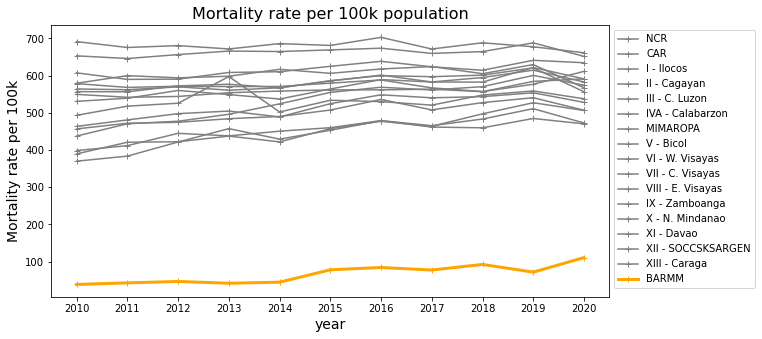

In [104]:
cols = ['NCR_death_rate', 'CAR_death_rate', 'R1_death_rate', 'R2_death_rate',
       'R3_death_rate', 'R4a_death_rate', 'R4b_death_rate', 'R5_death_rate',
       'R6_death_rate', 'R7_death_rate', 'R8_death_rate', 'R9_death_rate',
       'R10_death_rate', 'R11_death_rate', 'R12_death_rate',
       'CARAGA_death_rate', 'ARMM_death_rate']


plt.figure(figsize=(10,5))
for i,j in zip(cols, labels):
    series_death = df1[i]
    if i == 'ARMM_death_rate':
        plt.plot(x, series_death, '+-', label=j, color='orange', lw=3)
    else:
        plt.plot(x, series_death, '+-', label=j, color='grey')
        
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2021))
plt.title('Mortality rate per 100k population', fontsize=16);
plt.ylabel('Mortality rate per 100k', fontsize=14)
plt.xlabel('year', fontsize=14);

In [105]:
cols

['NCR_death_rate',
 'CAR_death_rate',
 'R1_death_rate',
 'R2_death_rate',
 'R3_death_rate',
 'R4a_death_rate',
 'R4b_death_rate',
 'R5_death_rate',
 'R6_death_rate',
 'R7_death_rate',
 'R8_death_rate',
 'R9_death_rate',
 'R10_death_rate',
 'R11_death_rate',
 'R12_death_rate',
 'CARAGA_death_rate',
 'ARMM_death_rate']

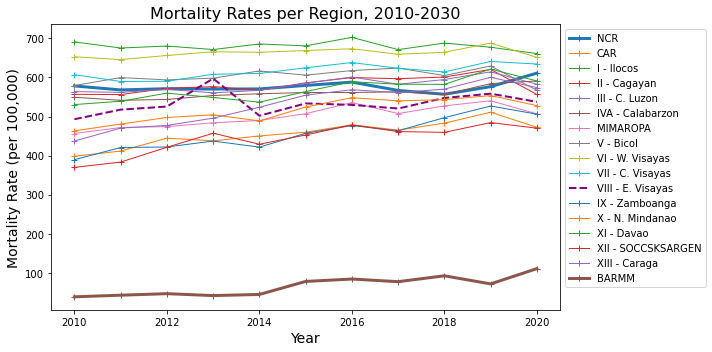

In [106]:
cols = ['NCR_death_rate', 'CAR_death_rate', 'R1_death_rate', 'R2_death_rate',
       'R3_death_rate', 'R4a_death_rate', 'R4b_death_rate', 'R5_death_rate',
       'R6_death_rate', 'R7_death_rate', 'R8_death_rate', 'R9_death_rate',
       'R10_death_rate', 'R11_death_rate', 'R12_death_rate',
       'CARAGA_death_rate','ARMM_death_rate']


plt.figure(figsize=(10,5))
for i,j in zip(cols, labels):
    series_death = df1[i]
    
    if (i=='R8_death_rate'):
        plt.plot(x, series_death, '--', label=j, color='purple', lw=2)
        
    elif (i=='NCR_death_rate') or i=='ARMM_death_rate':
        plt.plot(x, series_death, '+-', label=j, lw=3)
   
    else:
        plt.plot(x, series_death, '+-', label=j, lw=1)
        

plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2021,2))
plt.title('Mortality Rates per Region, 2010-2030', fontsize=16)
plt.ylabel('Mortality Rate (per 100,000)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('mortality_rate.png', dpi=300);

In [107]:
cols= ['year','ph_death_rate', 'NCR_death_rate', 'CAR_death_rate', 'R1_death_rate', 'R2_death_rate',
       'R3_death_rate', 'R4a_death_rate', 'R4b_death_rate', 'R5_death_rate',
       'R6_death_rate', 'R7_death_rate', 'R8_death_rate', 'R9_death_rate',
       'R10_death_rate', 'R11_death_rate', 'R12_death_rate',
       'CARAGA_death_rate', 'ARMM_death_rate']

In [108]:
df2 = df1[cols]

In [109]:
df_forecast = pd.DataFrame(df2.iloc[:,1:].mean().astype(int))

In [110]:
df_forecast = df_forecast.T
df_forecast

,ph_death_rate,NCR_death_rate,CAR_death_rate,R1_death_rate,R2_death_rate,R3_death_rate,R4a_death_rate,R4b_death_rate,R5_death_rate,R6_death_rate,R7_death_rate,R8_death_rate,R9_death_rate,R10_death_rate,R11_death_rate,R12_death_rate,CARAGA_death_rate,ARMM_death_rate
0,550,576,455,680,580,580,560,500,603,662,616,533,456,515,567,442,530,66


In [111]:
df = pd.DataFrame()
df['year'] = np.arange(2021, 2031)

In [112]:
df = df.join(df_forecast)

In [113]:
cols = df.columns[1:]
df = df.set_index('year')

In [114]:
for i,j in enumerate(cols):
    
    df.iloc[1:, i] = [(df[j].iloc[0]).astype(int)]*9

In [115]:
df = df.reset_index()

In [116]:
df_mortality = pd.concat([df2, df]).reset_index(drop=True)

In [117]:
df_mortality 

,year,ph_death_rate,NCR_death_rate,CAR_death_rate,R1_death_rate,R2_death_rate,R3_death_rate,R4a_death_rate,R4b_death_rate,R5_death_rate,R6_death_rate,R7_death_rate,R8_death_rate,R9_death_rate,R10_death_rate,R11_death_rate,R12_death_rate,CARAGA_death_rate,ARMM_death_rate
0,2010,528.500490,578.265389,398.301159,691.078963,556.769664,563.873377,549.350374,456.521018,579.291866,652.930726,607.130988,493.109295,389.481219,463.311694,530.618009,369.795290,437.300142,38.419724
1,2011,529.870407,568.069554,411.597926,675.399971,556.186339,561.767931,541.484575,471.869524,599.666183,645.729952,589.627960,517.648267,420.654778,480.713266,539.036365,383.393064,470.325086,42.590771
2,2012,537.322094,571.236527,444.645790,680.392324,572.202196,569.612414,543.767765,474.245910,593.782446,656.283750,590.235846,525.569530,422.033798,497.512728,559.879589,421.325696,477.188728,46.483084
3,2013,544.914158,570.320081,437.746065,671.470987,576.582089,560.664505,553.829171,483.963637,598.172896,665.791195,608.231818,597.276925,437.170151,504.487989,548.749605,457.244261,495.859779,41.599292
4,2014,541.383938,570.641355,450.372896,685.779471,566.953414,567.016650,558.206795,489.897745,616.707110,664.480893,610.225910,502.039342,421.675947,488.647607,536.861155,429.045382,523.852531,44.509684
5,2015,555.336983,579.584548,459.789761,680.916862,586.285355,585.227218,561.457563,507.249388,605.943692,668.885215,624.761046,533.540573,457.081551,524.328044,563.857606,452.818662,554.682084,77.830825
6,2016,567.375293,588.046131,478.848785,702.614405,599.714569,601.157147,561.428320,535.685181,617.643448,673.500395,638.175933,529.827691,476.924472,548.187396,589.050031,478.559289,568.565221,83.983409
7,2017,555.492250,566.800643,465.148827,671.282403,596.856209,582.637006,563.270764,507.612716,624.052498,659.419353,623.443602,520.469702,463.637001,540.133594,582.657660,461.452359,561.153221,77.193159
8,2018,558.103159,556.976850,483.097774,687.991102,601.053436,594.652084,556.562110,527.185454,604.916892,664.357002,614.188452,547.542715,497.026486,543.279199,582.335902,459.453106,570.118481,92.238629
9,2019,577.763714,576.513861,510.915624,677.369972,620.550550,614.382197,584.201933,540.391765,629.393757,687.848453,640.915778,558.527451,526.903593,553.603030,621.564233,484.503216,600.327872,71.499042


In [118]:
labels

['NCR',
 'CAR',
 'I - Ilocos',
 'II - Cagayan',
 'III - C. Luzon',
 'IVA - Calabarzon',
 'MIMAROPA',
 'V - Bicol',
 'VI - W. Visayas',
 'VII - C. Visayas',
 'VIII - E. Visayas',
 'IX - Zamboanga',
 'X - N. Mindanao',
 'XI - Davao',
 'XII - SOCCSKSARGEN',
 'XIII - Caraga',
 'BARMM']

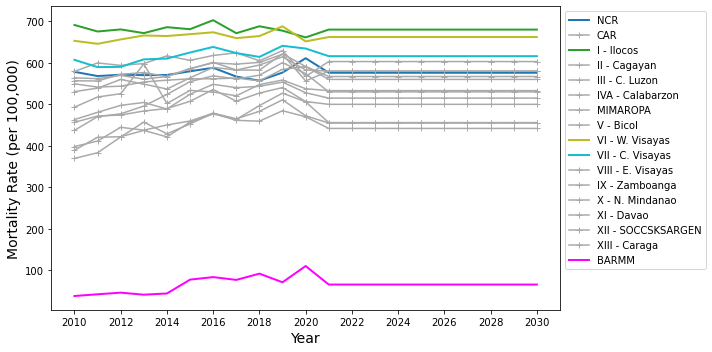

In [119]:
cols = ['NCR_death_rate', 'CAR_death_rate', 'R1_death_rate', 'R2_death_rate',
       'R3_death_rate', 'R4a_death_rate', 'R4b_death_rate', 'R5_death_rate',
       'R6_death_rate', 'R7_death_rate', 'R8_death_rate', 'R9_death_rate',
       'R10_death_rate', 'R11_death_rate', 'R12_death_rate',
       'CARAGA_death_rate','ARMM_death_rate']

labels = ["NCR", "CAR", "I - Ilocos", "II - Cagayan",
          "III - C. Luzon", "IVA - Calabarzon",
          "MIMAROPA", "V - Bicol", "VI - W. Visayas",
          "VII - C. Visayas", "VIII - E. Visayas", 
          "IX - Zamboanga",
          "X - N. Mindanao", "XI - Davao", "XII - SOCCSKSARGEN",
          "XIII - Caraga", "BARMM"]

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
         'tab:brown', 'tab:pink', 'indigo', 'tab:olive', 'tab:cyan',
         'darkmagenta', 'maroon', 'lime', 'darkolivegreen', 'cadetblue',
         'darkgoldenrod', 'fuchsia']


plt.figure(figsize=(10,5))
for i,(idx, j) in zip(cols, enumerate(labels)):
    series_death = df_mortality[i]
    
    if j in ['BARMM', "I - Ilocos", "VI - W. Visayas","VII - C. Visayas", 'NCR' ]:
        plt.plot(years, series_death, label=j, color=colors[idx], lw=2)
        
    else:
        plt.plot(years, series_death, '+-', label=j, color='darkgrey')
        
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2031,2))
plt.ylabel('Mortality Rate (per 100,000)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('PPT_mortality_rate.png', dpi=300);

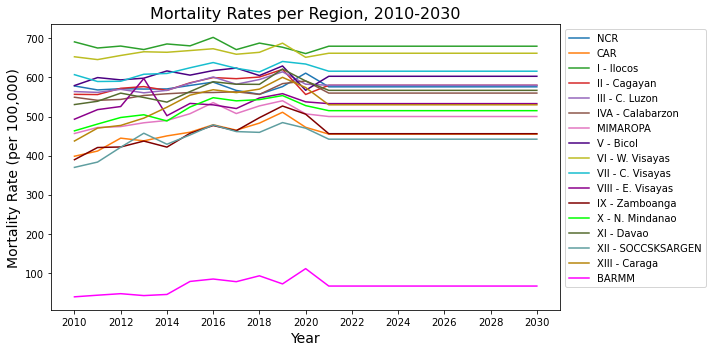

In [120]:
plt.figure(figsize=(10,5))
for i,(idx, j) in zip(cols, enumerate(labels)):
    series_death = df_mortality[i]  
    plt.plot(years, series_death, label=j, color=colors[idx])
        
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2031,2))
plt.title('Mortality Rates per Region, 2010-2030', fontsize=16);
plt.ylabel('Mortality Rate (per 100,000)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('mortality_rate.png', dpi=300);

In [121]:
df_mortality.tail()

,year,ph_death_rate,NCR_death_rate,CAR_death_rate,R1_death_rate,R2_death_rate,R3_death_rate,R4a_death_rate,R4b_death_rate,R5_death_rate,R6_death_rate,R7_death_rate,R8_death_rate,R9_death_rate,R10_death_rate,R11_death_rate,R12_death_rate,CARAGA_death_rate,ARMM_death_rate
16,2026,550.0,576.0,455.0,680.0,580.0,580.0,560.0,500.0,603.0,662.0,616.0,533.0,456.0,515.0,567.0,442.0,530.0,66.0
17,2027,550.0,576.0,455.0,680.0,580.0,580.0,560.0,500.0,603.0,662.0,616.0,533.0,456.0,515.0,567.0,442.0,530.0,66.0
18,2028,550.0,576.0,455.0,680.0,580.0,580.0,560.0,500.0,603.0,662.0,616.0,533.0,456.0,515.0,567.0,442.0,530.0,66.0
19,2029,550.0,576.0,455.0,680.0,580.0,580.0,560.0,500.0,603.0,662.0,616.0,533.0,456.0,515.0,567.0,442.0,530.0,66.0
20,2030,550.0,576.0,455.0,680.0,580.0,580.0,560.0,500.0,603.0,662.0,616.0,533.0,456.0,515.0,567.0,442.0,530.0,66.0


In [122]:
df_mortality.to_csv('~/cpt5/capstone/data/processed/mortality_rate_per_100k_2010-2030.csv')

# Get forecasted raw death counts 2021-2030

In [123]:
df_mortality.shape

(21, 19)

In [124]:
df_pop = df_pop.set_index('year')

In [125]:
df_pop1 = df_pop[pops].loc[2021:,:]
df_pop1

,Philippines,NCR,CAR,I - Ilocos,II - Cagayan,III - C. Luzon,IVA - Calabarzon,MIMAROPA,V - Bicol,VI - W. Visayas,VII - C. Visayas,VIII - E. Visayas,IX - Zamboanga,X - N. Mindanao,XI - Davao,XII - SOCCSKSARGEN,XIII - Caraga,BARMM
year,,,,,,,,,,,,,,,,,,
2021,110308765.0,13632370.0,1819164.0,5365538.0,3729141.0,12559014.0,16400200.0,3262679.0,6153823.0,8048599.0,8176384.0,4602369.0,3787969.0,5082746.0,5300310.0,4616760.0,2835647.0,4936052.0
2022,111544191.0,13775223.0,1840023.0,5428002.0,3771156.0,12691572.0,16599113.0,3295749.0,6223244.0,8139555.0,8267792.0,4655935.0,3829303.0,5140965.0,5355267.0,4655271.0,2865446.0,5010575.0
2023,112737707.0,13913026.0,1860216.0,5488451.0,3811726.0,12819703.0,16791312.0,3327535.0,6290306.0,8227461.0,8356089.0,4707797.0,3869156.0,5197325.0,5408163.0,4691959.0,2894155.0,5083327.0
2024,113887657.0,14045789.0,1879713.0,5546804.0,3850804.0,12943110.0,16976427.0,3357990.0,6354938.0,8312193.0,8441179.0,4757863.0,3907493.0,5251727.0,5458954.0,4726825.0,2921727.0,5154121.0
2025,115003758.0,14174317.0,1898676.0,5603519.0,3888710.0,13062965.0,17156239.0,3387415.0,6417675.0,8394478.0,8523735.0,4806559.0,3944624.0,5304631.0,5508063.0,4760360.0,2948422.0,5223370.0
2026,116130773.0,14304145.0,1917845.0,5660792.0,3926959.0,13184570.0,17337222.0,3417109.0,6481007.0,8477587.0,8607104.0,4855716.0,3982087.0,5358101.0,5557626.0,4794341.0,2975365.0,5293197.0
2027,117268879.0,14435341.0,1937210.0,5718624.0,3965560.0,13307629.0,17519636.0,3447096.0,6544953.0,8561515.0,8691303.0,4905388.0,4019883.0,5412127.0,5607740.0,4828677.0,3002596.0,5363601.0
2028,118418094.0,14567786.0,1956783.0,5777007.0,4004516.0,13432341.0,17703432.0,3477365.0,6609521.0,8646251.0,8776312.0,4955550.0,4058033.0,5466726.0,5658354.0,4863431.0,3030102.0,5434584.0
2029,119578586.0,14701475.0,1976572.0,5835962.0,4043831.0,13558763.0,17888618.0,3507923.0,6674695.0,8731821.0,8862173.0,5006210.0,4096549.0,5521879.0,5709410.0,4898618.0,3057890.0,5506197.0


In [126]:
forecast_mortality = df_mortality.copy()
forecast_rate = forecast_mortality.iloc[11:,:]
forecast_rate.set_index('year', inplace=True)
forecast_rate

,ph_death_rate,NCR_death_rate,CAR_death_rate,R1_death_rate,R2_death_rate,R3_death_rate,R4a_death_rate,R4b_death_rate,R5_death_rate,R6_death_rate,R7_death_rate,R8_death_rate,R9_death_rate,R10_death_rate,R11_death_rate,R12_death_rate,CARAGA_death_rate,ARMM_death_rate
year,,,,,,,,,,,,,,,,,,
2021,550.0,576.0,455.0,680.0,580.0,580.0,560.0,500.0,603.0,662.0,616.0,533.0,456.0,515.0,567.0,442.0,530.0,66.0
2022,550.0,576.0,455.0,680.0,580.0,580.0,560.0,500.0,603.0,662.0,616.0,533.0,456.0,515.0,567.0,442.0,530.0,66.0
2023,550.0,576.0,455.0,680.0,580.0,580.0,560.0,500.0,603.0,662.0,616.0,533.0,456.0,515.0,567.0,442.0,530.0,66.0
2024,550.0,576.0,455.0,680.0,580.0,580.0,560.0,500.0,603.0,662.0,616.0,533.0,456.0,515.0,567.0,442.0,530.0,66.0
2025,550.0,576.0,455.0,680.0,580.0,580.0,560.0,500.0,603.0,662.0,616.0,533.0,456.0,515.0,567.0,442.0,530.0,66.0
2026,550.0,576.0,455.0,680.0,580.0,580.0,560.0,500.0,603.0,662.0,616.0,533.0,456.0,515.0,567.0,442.0,530.0,66.0
2027,550.0,576.0,455.0,680.0,580.0,580.0,560.0,500.0,603.0,662.0,616.0,533.0,456.0,515.0,567.0,442.0,530.0,66.0
2028,550.0,576.0,455.0,680.0,580.0,580.0,560.0,500.0,603.0,662.0,616.0,533.0,456.0,515.0,567.0,442.0,530.0,66.0
2029,550.0,576.0,455.0,680.0,580.0,580.0,560.0,500.0,603.0,662.0,616.0,533.0,456.0,515.0,567.0,442.0,530.0,66.0


In [127]:
df_forecast = pd.DataFrame()
df_forecast['year'] = np.arange(2021,2031)

In [128]:
labels = df_new.columns[1:]
for i,j,k in zip(forecast_rate, df_pop1, labels):
    death_count = ((forecast_rate[i] * df_pop1[j])/100_000)
    df_forecast[k] = death_count.tolist()
#     df1[i+'_rate'] = (df1[i] / df1[j])*100_000

In [129]:
df_forecast

,year,ph_death,NCR_death,CAR_death,R1_death,R2_death,R3_death,R4a_death,R4b_death,R5_death,R6_death,R7_death,R8_death,R9_death,R10_death,R11_death,R12_death,CARAGA_death,ARMM_death
0,2021,606698.2075,78522.45120,8277.19620,36485.6584,21629.0178,72842.2812,91841.1200,16313.395,37107.55269,53281.72538,50366.52544,24530.62677,17273.13864,26176.14190,30052.75770,20406.07920,15028.9291,3257.79432
1,2022,613493.0505,79345.28448,8372.10465,36910.4136,21872.7048,73611.1176,92955.0328,16478.745,37526.16132,53883.85410,50929.59872,24816.13355,17461.62168,26475.96975,30364.36389,20576.29782,15186.8638,3306.97950
2,2023,620057.3885,80139.02976,8463.98280,37321.4668,22108.0108,74354.2774,94031.3472,16637.675,37930.54518,54465.79182,51473.50824,25092.55801,17643.35136,26766.22375,30664.28421,20738.45878,15339.0215,3354.99582
3,2024,626382.1135,80903.74464,8552.69415,37718.2672,22334.6632,75070.0380,95067.9912,16789.950,38320.27614,55026.71766,51997.66264,25359.40979,17818.16808,27046.39405,30952.26918,20892.56650,15485.1531,3401.71986
4,2025,632520.6690,81644.06592,8638.97580,38103.9292,22554.5180,75765.1970,96074.9384,16937.075,38698.58025,55571.44436,52506.20760,25618.95947,17987.48544,27318.84965,31230.71721,21040.79120,15626.6366,3447.42420
5,2026,638719.2515,82391.87520,8726.19475,38493.3856,22776.3622,76470.5060,97088.4432,17085.545,39080.47221,56121.62594,53019.76064,25880.96628,18158.31672,27594.22015,31511.73942,21190.98722,15769.4345,3493.51002
6,2027,644978.8345,83147.56416,8814.30550,38886.6432,23000.2480,77184.2482,98109.9616,17235.480,39466.06659,56677.22930,53538.42648,26145.71804,18330.66648,27872.45405,31795.88580,21342.75234,15913.7588,3539.97666
7,2028,651299.5170,83910.44736,8903.36265,39283.6476,23226.1928,77907.5778,99139.2192,17386.825,39855.41163,57238.18162,54062.08192,26413.08150,18504.63048,28153.63890,32082.86718,21496.36502,16059.5406,3586.82544
8,2029,657682.2230,84680.49600,8993.40260,39684.5416,23454.2198,78640.8254,100176.2608,17539.615,40248.41085,57804.65502,54590.98568,26683.09930,18680.26344,28437.67685,32372.35470,21651.89156,16206.8170,3634.09002
9,2030,664127.5245,85458.39552,9084.35710,40089.4476,23684.3870,79383.6546,101220.8008,17693.815,40645.29339,58376.72894,55125.07616,26955.89936,18857.55168,28724.66060,32664.72258,21809.31428,16355.5244,3681.74334


In [130]:
df_new.columns[1:]

Index(['ph_death', 'NCR_death', 'CAR_death', 'R1_death', 'R2_death',
       'R3_death', 'R4a_death', 'R4b_death', 'R5_death', 'R6_death',
       'R7_death', 'R8_death', 'R9_death', 'R10_death', 'R11_death',
       'R12_death', 'CARAGA_death', 'ARMM_death'],
      dtype='object')

In [131]:
mortality_counts = pd.concat([df_new, df_forecast]).reset_index(drop=True)

In [132]:
mortality_counts.to_csv('mortality_count_per_100k_2010-2030.csv')

In [133]:
mortality_counts

,year,ph_death,NCR_death,CAR_death,R1_death,R2_death,R3_death,R4a_death,R4b_death,R5_death,R6_death,R7_death,R8_death,R9_death,R10_death,R11_death,R12_death,CARAGA_death,ARMM_death
0,2010,488006.0000,68559.00000,6440.00000,32815.0000,17979.0000,57164.0000,69272.0000,12530.000,31400.00000,46374.00000,41286.00000,20224.00000,13271.00000,19910.00000,23711.00000,15197.00000,10623.0000,1251.00000
1,2011,498274.0000,68490.00000,6740.00000,32439.0000,18203.0000,58143.0000,70205.0000,13154.000,32948.00000,46413.00000,40787.00000,21575.00000,14517.00000,21028.00000,24537.00000,16084.00000,11580.0000,1431.00000
2,2012,514411.0000,70018.00000,7373.00000,33050.0000,18977.0000,60164.0000,72434.0000,13424.000,33064.00000,47731.00000,41521.00000,22255.00000,14749.00000,22146.00000,25953.00000,18036.00000,11906.0000,1610.00000
3,2013,530938.0000,71050.00000,7349.00000,32983.0000,19374.0000,60409.0000,75743.0000,13907.000,33751.00000,48990.00000,43500.00000,25689.00000,15469.00000,22845.00000,25895.00000,19965.00000,12535.0000,1484.00000
4,2014,536697.0000,72235.00000,7654.00000,34060.0000,19298.0000,62297.0000,78326.0000,14288.000,35253.00000,49460.00000,44358.00000,21927.00000,15105.00000,22504.00000,25782.00000,19101.00000,13415.0000,1634.00000
5,2015,559965.0000,74530.00000,7909.00000,34190.0000,20212.0000,65540.0000,80778.0000,15012.000,35086.00000,50358.00000,46147.00000,23658.00000,16573.00000,24551.00000,27549.00000,20547.00000,14387.0000,2938.00000
6,2016,581731.0000,76839.00000,8329.00000,35666.0000,20952.0000,68757.0000,82764.0000,16105.000,36228.00000,51256.00000,47937.00000,23821.00000,17457.00000,26070.00000,29260.00000,22115.00000,14939.0000,3236.00000
7,2017,578652.0000,75185.00000,8176.00000,34427.0000,21115.0000,67980.0000,84971.0000,15489.000,37052.00000,50701.00000,47575.00000,23721.00000,17123.00000,26065.00000,29415.00000,21693.00000,14928.0000,3036.00000
8,2018,590223.0000,74934.00000,8576.00000,35627.0000,21516.0000,70706.0000,85816.0000,16313.000,36331.00000,51580.00000,47569.00000,25292.00000,18512.00000,26580.00000,29870.00000,21950.00000,15348.0000,3703.00000
9,2019,619872.0000,78599.00000,9155.00000,35398.0000,22462.0000,74374.0000,91969.0000,16944.000,38213.00000,53899.00000,50335.00000,26143.00000,19782.00000,27438.00000,32384.00000,23500.00000,16347.0000,2930.00000


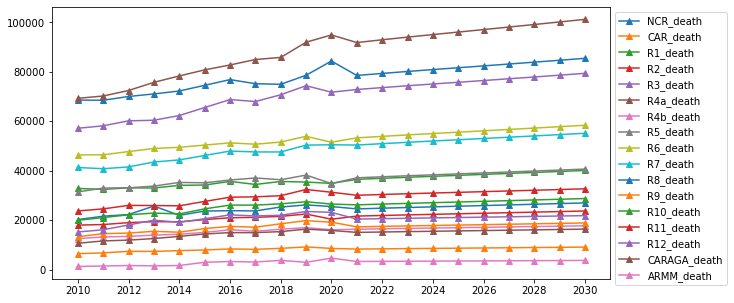

In [134]:
plt.figure(figsize=(10,5))
for i in regions:
    series_death = mortality_counts[i]
    plt.plot(np.arange(2010,2031), series_death, '^-', label=i)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2031,2));